In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_csv('IBM.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
Date         1509 non-null object
Open         1509 non-null float64
High         1509 non-null float64
Low          1509 non-null float64
Close        1509 non-null float64
Adj Close    1509 non-null float64
Volume       1509 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-04-30,206.710007,207.960007,206.320007,207.080002,171.139999,2773200
1,2012-05-01,207.179993,208.929993,206.710007,208.000000,171.900360,2715900
2,2012-05-02,206.970001,208.270004,206.910004,208.059998,171.949890,2360300
3,2012-05-03,208.270004,208.919998,206.550003,207.240005,171.272232,2826600
4,2012-05-04,206.470001,207.110001,204.399994,204.990005,169.412750,4023600


In [5]:
dfibm=df.groupby(["Date"],as_index=False).agg({'Open':'mean','Adj Close':'mean','Volume':sum})

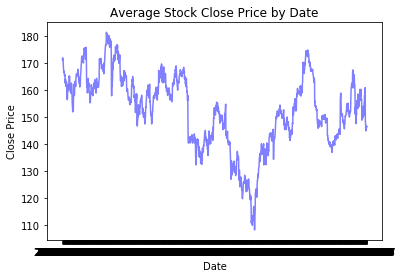

In [6]:
x=dfibm['Date']
y=dfibm['Adj Close']
plt.plot(x, y,color="blue",alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Average Stock Close Price by Date')
plt.show()

In [7]:
df[df['Date']=='2017-01-31']

,Date,Open,High,Low,Close,Adj Close,Volume
1196,2017-01-31,175.050003,175.580002,173.610001,174.520004,166.365753,4139000


In [8]:
df[df['Date']=='2017-02-01']

,Date,Open,High,Low,Close,Adj Close,Volume
1197,2017-02-01,175.0,175.699997,172.889999,174.289993,166.146484,2795700


In [9]:
df_train = df[:1197]
df_test = df[1197:]

In [10]:
training_set = df_train.iloc[:,1:2].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
X_train=[]
y_train=[]
for i in range(60,1197):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [13]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
regressor = Sequential()

In [16]:
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(Dense(units = 1))

In [21]:
regressor.compile(optimizer = 'adam',loss ='mean_squared_error')

In [22]:
regressor.fit(X_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
1137/1137 [==============================] - 7s 6ms/step - loss: 0.0582
Epoch 2/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0100
Epoch 3/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0076
Epoch 4/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0073
Epoch 5/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0069
Epoch 6/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0066
Epoch 7/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0065
Epoch 8/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0075
Epoch 9/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0064
Epoch 10/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0068
Epoch 11/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0055
Epoch 12/100
1137/1137 [==============================] - 4s 4ms/step - lo

1137/1137 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 98/100
1137/1137 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 99/100
1137/1137 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 100/100
1137/1137 [==============================] - 4s 4ms/step - loss: 0.0015


In [23]:
real_stock_price = df_test.iloc[:,1:2].values

In [24]:
df_total = pd.concat((df['Open'],df['Open']), axis = 0)
inputs = df_total[len(df_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test =[]
for i in range(60,372):
    x_test.append(inputs[i-60:i,0])

In [25]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

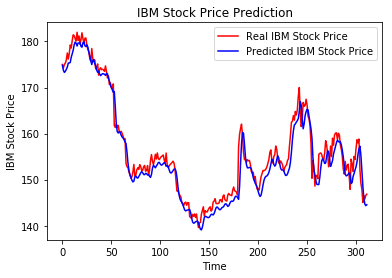

In [26]:
plt.plot(real_stock_price,color = 'red',label = 'Real IBM Stock Price')
plt.plot(predicted_stock_price,color = 'b',label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()